In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### 数据集导入及分析

In [9]:
boston = load_boston()

In [10]:
regressor = DecisionTreeRegressor(random_state=0)

#### 因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。


In [22]:
cross_val_score(regressor, boston.data, boston.target, cv=10,scoring = "neg_mean_squared_error")#neg_mean_squared_error 指的是MSE的相反数

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

### 一维图像的绘制--正弦曲线

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#### 1.制造噪声数据

In [41]:
np.random.seed =1
X = np.sort(5*np.random.rand(80,1),axis=0) #np.random.rand(80,1) 创造一个（80,1）的区间在（0,1)的随机矩阵
Y = np.sin(X).flatten()
Y[::5] += 3 * (0.5 - np.random.rand(16))#制造噪声

#### 2.查看数据分布情况

<IPython.core.display.Javascript object>


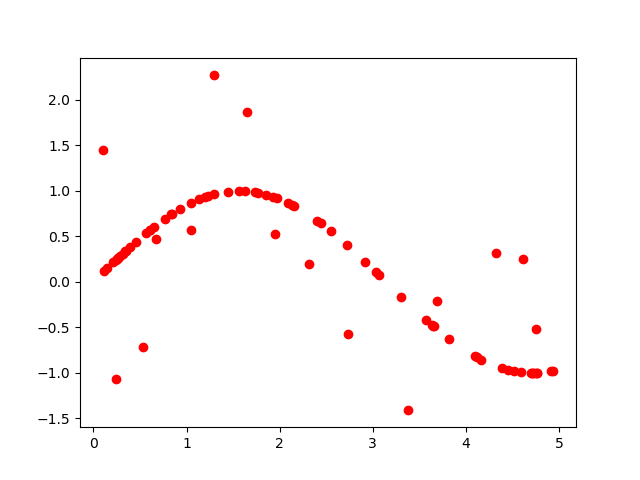

In [44]:
plt.scatter(X.tolist(),Y.tolist(),color='red')
plt.show()

#### 3.训练回归树模型

In [42]:
dtr1 = DecisionTreeRegressor(max_depth=2)
dtr2 = DecisionTreeRegressor(max_depth=5)
dtr1.fit(X,Y)
dtr2.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 4.新建测试训练集并预测

In [53]:
test = np.linspace(0,5,25).reshape(-1, 1) #注意，这个地方需要扩成2位的矩阵才行！！！
y1=dtr1.predict(test)
y2=dtr2.predict(test)

<IPython.core.display.Javascript object>


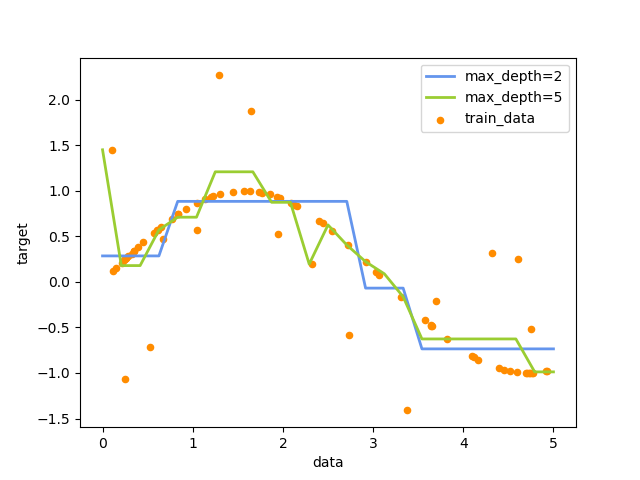

In [54]:
#### 5.绘制回归曲线
plt.figure()#声明画布
plt.scatter(X.tolist(),Y.tolist(),color='darkorange',s=20,label='train_data')#画散点图,注意尺寸不是size而是s!
plt.plot(test,y1, color="cornflowerblue",label="max_depth=2", linewidth=2)#绘制曲线
plt.plot(test,y2, color="yellowgreen",label="max_depth=5", linewidth=2)#绘制曲线
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

### 实例：泰坦尼克号获救预测

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### 1.导入数据集并分析

In [65]:
data = pd.read_csv(r'C:\Users\Mypc\Desktop\菜菜\源文件\01-决策树\Taitanic data\data.csv',index_col= 0)

In [66]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 2.对数据集进行预处理

In [67]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [69]:
data = data.dropna()

In [70]:
#将分类变量转换为数值型变量,因为是回归预测,最好全部是数值型数据
#将二分类变量转换为数值型变量 
data['Sex']=(data['Sex']=='male').astype('int')

#将三分类变量转换为数值型变量
labels=data['Embarked'].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))

In [71]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [72]:
data['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

#### 3.提取标签和特征矩阵，分测试集和训练集

In [74]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index =range(i.shape[0])

Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,55.000000,0,0,16.0000,0
1,2,0,34.000000,0,0,10.5000,0
2,3,1,29.699118,0,0,56.4958,0
3,1,1,47.000000,0,0,34.0208,0
4,3,0,29.699118,1,0,15.5000,2


#### 4.导入模型，粗跑一下看看结果

In [80]:
clf = DecisionTreeClassifier(random_state=4545)
clf = clf.fit(Xtrain,Ytrain)
score =clf.score(Xtest,Ytest)
score

0.7752808988764045

In [82]:
#交叉验证跑一下先
score_mean=cross_val_score(clf,X,y,cv=10).mean()
score_mean

0.7784601634320737

#### 5.在不同的max_depth下探索模型的拟合情况

0.034912667627903016


<IPython.core.display.Javascript object>


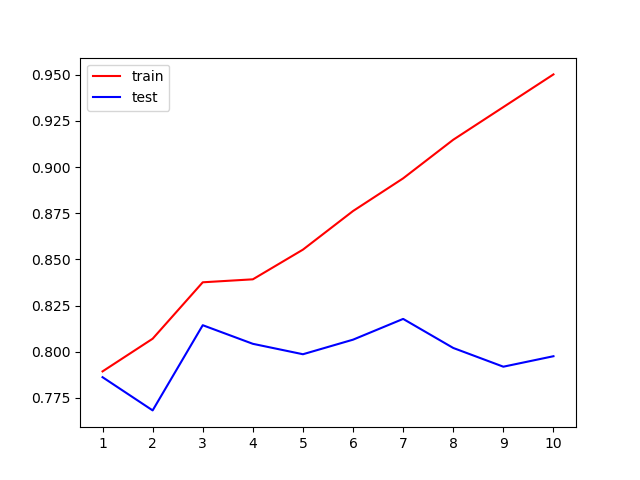

In [91]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1)
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    if(i==3):
        print(score_tr-score_te)
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [86]:
# 模型证明 ，max_depth=3时，拟合的最好。但是还是有些过拟合0.0349。我们现在取巧一下，尝试criterion=entropy的情况下看看

0.039394281519629204


<IPython.core.display.Javascript object>


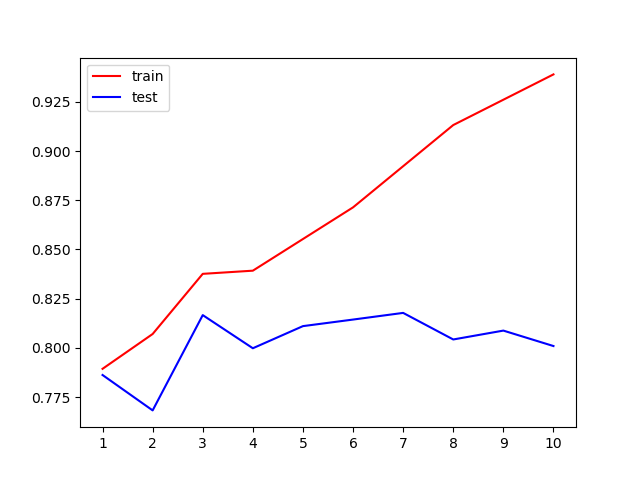

In [93]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion='entropy')
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    if(i== 3):
        print(score_tr-score_te)
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [94]:
# 好像并没什么卵用，反而过拟合严重一些

#### 6.用网格搜索调整参数

In [95]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

In [97]:
params = {
        'splitter':['best','random']
        ,'criterion':['gini','entropy']
        ,'max_depth':[*range(1,10)]
        ,'min_samples_leaf':[*range(1,50,5)]
        ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
        }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,params,cv=10)
GS.fit(Xtrain,Ytrain)
GS.best_params_

D:\develop\Anaconda3\envs\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [98]:
#其实调参并不是一定需要很多个参数。。有可能多了参数反而导致准确率降低

In [100]:
GS.best_score_

0.8295819935691319